# Using Python for Research Homework: Week 3, Case Study 2

In this case study, we will find and plot the distribution of word frequencies for each translation of Hamlet.  Perhaps the distribution of word frequencies of Hamlet depends on the translation --- let's find out!

In [26]:
# DO NOT EDIT THIS CODE!
import os
import pandas as pd
import numpy as np
from collections import Counter

def count_words_fast(text):
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

def read_book(title_path):
    text   = pd.read_csv(title_path, sep = "\n", engine='python', encoding="utf8")
    text = text.to_string(index = False)
    return text

def word_stats(word_counts):
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

### Exercise 1 

In this case study, we will find and visualize summary statistics of the text of different translations of Hamlet. For this case study, functions `count_words_fast`, `read_book`, and `word_stats` are already defined as in the Case 2 Videos (Videos 3.2.x).

#### Instructions 
- Read in the data as a pandas dataframe using `pd.read_csv`. The data can be found at https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@hamlets.csv

In [42]:
hamlets = pd.read_csv("/Users/adityavenkat/Desktop/BITS/Data Science/EdX/Python Research/hamlets.csv", usecols= ['language','text'])  ## Complete this line of code! ##
print(hamlets.head())

print("\n#: " + str(len(hamlets.language)))
#print(hamlets[,2])

     language                                               text
0     English  The Tragedie of Hamlet\n                      ...
1      German  Hamlet, Prinz von Dännemark.\n                ...
2  Portuguese  HAMLET\n                             DRAMA EM ...

#: 3


### Exercise 2 

In this exercise, we will summarize the text for a single translation of Hamlet in a `pandas` dataframe. 

#### Instructions
- Find the dictionary of word frequency in `text` by calling `count_words_fast()`. Store this as `counted_text`.
- Create a `pandas` dataframe named `data`.
- Using `counted_text`, define two columns in data:
    - `word`, consisting of each unique word in text.
    - `count`, consisting of the number of times each word in `word` is included in the text.

In [46]:
[language, text] = hamlets.iloc[0]

# Enter your code here.
counted_text = count_words_fast(text)

data = pd.DataFrame({'word': list(counted_text.keys()), 'count': list(counted_text.values())})
print(data.head())

print(data[data.word=='hamlet'])

       word  count
0       the    935
1  tragedie      3
2        of    576
3    hamlet     97
4            45513
97
     word  count
3  hamlet     97


### Exercise 3

In this exercise, we will continue to define summary statistics for a single translation of Hamlet. 

#### Instructions
- Add a column to data named `length`, defined as the length of each word.
- Add another column named `frequency`, which is defined as follows for each word in `data`:
    - If `count > 10`, `frequency` is "frequent".
    - If `1 < count <= 10`, `frequency` is "infrequent".
    - If `count == 1`, `frequency` is "unique".

In [61]:
# write your code here!
data["length"]=data["word"].str.len()

import numpy as np

data["frequency"] = np.where(data["count"]>10,"frequent",np.where(data["count"]>1,"infrequent","unique"))

print(data.head())
print(data.shape)
print(data[data.frequency=="unique"].shape)
#print(data.shape)

       word  count  length   frequency
0       the    935       3    frequent
1  tragedie      3       8  infrequent
2        of    576       2    frequent
3    hamlet     97       6    frequent
4            45513       0    frequent
(5113, 4)
(3348, 4)


### Exercise 4

In this exercise, we will summarize the statistics in data into a smaller pandas dataframe. 

#### Instructions 
- Create a `pandas` dataframe named `sub_data` including the following columns:
    - `language`, which is the language of the text.
    - `frequency`, which is a list containing the strings "frequent", "infrequent", and "unique".
    - `mean_word_length`, which is the mean word length of each value in frequency.
    - `num_words`, which is the total number of words in each frequency category.

In [78]:
# write your code here!


#ONLY PARTIALLY COMPLETE, REFER TO THE FUNCTION IN THE NEXT QUESTION TO GET AN ANSWER!!

sub_data_1 = data.groupby(["frequency"], as_index = False).length.mean()

print(sub_data_1)

sub_data_2 = data.groupby(["frequency"]).word.count()

print(sub_data_2)

sub_data_3 = pd.concat([data.groupby(["frequency"], as_index=False).length.mean(),data.groupby(["frequency"], as_index = False).word.count()], axis = 1)

print(sub_data_3)

    frequency    length
0    frequent  4.371517
1  infrequent  5.825243
2      unique  7.005675
frequency
frequent       323
infrequent    1442
unique        3348
Name: word, dtype: int64
    frequency    length   frequency  word
0    frequent  4.371517    frequent   323
1  infrequent  5.825243  infrequent  1442
2      unique  7.005675      unique  3348


### Exercise 5

In this exercise, we will join all the data summaries for text Hamlet translation.

#### Instructions 
- The previous code for summarizing a particular translation of Hamlet is consolidated into a single function called `summarize_text`. Create a pandas dataframe` grouped_data` consisting of the results of `summarize_text` for each translation of Hamlet in `hamlets`.
    - Use a `for` loop across the row indices of `hamlets` to assign each translation to a new row.
    - Obtain the `ith` row of `hamlets` to variables using the `.iloc` method, and assign the output to variables `language` and `text`.
    - Call `summarize_text` using `language` and `text`, and assign the output to `sub_data`.
    - Use the pandas `.append()` function to append to pandas dataframes row-wise to `grouped_data`.

In [80]:
def summarize_text(language, text):
    counted_text = count_words_fast(text)

    data = pd.DataFrame({
        "word": list(counted_text.keys()),
        "count": list(counted_text.values())
    })
    
    data.loc[data["count"] > 10,  "frequency"] = "frequent"
    data.loc[data["count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["count"] == 1,  "frequency"] = "unique"
    
    data["length"] = data["word"].apply(len)
    
    sub_data = pd.DataFrame({
        "language": language,
        "frequency": ["frequent","infrequent","unique"],
        "mean_word_length": data.groupby(by = "frequency")["length"].mean(),
        "num_words": data.groupby(by = "frequency").size()
    })
    
    return(sub_data)
    
# write your code here!
for i in range(len(hamlets)):
    if i == 0:
        [language, text] = hamlets.iloc[i]
        grouped_data = summarize_text(language, text)
    else:
        [language, text] = hamlets.iloc[i]        
        grouped_data = grouped_data.append(summarize_text(language, text))
        
print(grouped_data)

              language   frequency  mean_word_length  num_words
frequency                                                      
frequent       English    frequent          4.371517        323
infrequent     English  infrequent          5.825243       1442
unique         English      unique          7.005675       3348
frequent        German    frequent          4.528053        303
infrequent      German  infrequent          6.481830       1596
unique          German      unique          9.006987       5582
frequent    Portuguese    frequent          4.417625        261
infrequent  Portuguese  infrequent          6.497870       1643
unique      Portuguese      unique          8.669778       5357


### Exercise 6

In this exercise, we will plot our results and look for differences across each translation.

#### Instructions 
- Plot the word statistics of each translations on a single plot. Note that we have already done most of the work for you.
- Consider: do the word statistics differ by translation?

language               English
frequency           infrequent
mean_word_length       5.82524
num_words                 1442
Name: infrequent, dtype: object
infrequent English


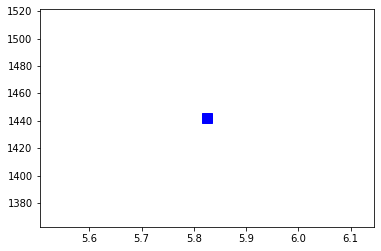

In [90]:
colors = {"Portuguese": "green", "English": "blue", "German": "red"}
markers = {"frequent": "o","infrequent": "s", "unique": "^"}
import matplotlib.pyplot as plt
for i in range(grouped_data.shape[0]):
    row = grouped_data.iloc[i]
    plt.plot(row.mean_word_length, row.num_words,
        marker=markers[row.frequency],
        color = colors[row.language],
        markersize = 10
    )

color_legend = []
marker_legend = []
for color in colors:
    color_legend.append(
        plt.plot([], [],
        color=colors[color],
        marker="o",
        label = color, markersize = 10, linestyle="None")
    )
for marker in markers:
    marker_legend.append(
        plt.plot([], [],
        color="k",
        marker=markers[marker],
        label = marker, markersize = 10, linestyle="None")
    )
plt.legend(numpoints=1, loc = "upper left")

plt.xlabel("Mean Word Length")
plt.ylabel("Number of Words")
# write your code to display the plot here!